In [1]:
import pickle
import numpy as np
import pandas as pd
import math
import os
import sys
import matplotlib.pyplot as plt
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['font.size'] = 8
rcParams['text.latex.preamble'] = r'\usepackage{amsmath,amssymb}'  

sys.path.append(os.path.abspath("../src"))

from dynamics import *
from simul import *
from utils import *

### Reproducing the result for the robustness test

In [2]:
# Get the directory of the result of numerical experiments

path = os.getcwd()
pardir = os.path.abspath(os.path.join(path, os.pardir)) # gets parent directory

# The results_robustness directory should be updated to the correct local directory if one runs a new experiment.
# For the reproduction of the result of manuscript, use the following line: 
file_dir = os.path.join(pardir,'results_robustness/2025-05-11/') 

# List all subdirectories within the file_dir.
dirs = [f for f in os.listdir(file_dir) if not os.path.isfile(os.path.join(file_dir, f))]

In [3]:
# Sorting function
def extract_components(item):
    # Split the string into components
    system, number, step_size, boolean = item.rsplit('_', 3)
    return (system, int(number), float(step_size), boolean == 'True')

# Sort all subdirectories using the components
sorted_dirs = sorted(dirs, key=extract_components)

# Print the sorted list
print(sorted_dirs)

# Create a directory for saving the figures
# In the form of figure_robustness/"%Y-%m-%d".
base_dir = create_experiment_dir(os.path.join(pardir,'figure_robustness'))

['Cubic_12_0.01_False', 'Cubic_12_0.1_Irregular', 'Cubic_12_0.1_True', 'Duffing_12_0.01_False', 'Duffing_12_0.1_Irregular', 'Duffing_12_0.1_True', 'Pendulum_12_0.01_False', 'Pendulum_12_0.1_Irregular', 'Pendulum_12_0.1_True']


Experiment configuration - dyn: Cubic,
seed: 12, time interval: 0.01, Randomness: False
Experiment configuration - dyn: Cubic,
seed: 12, time interval: 0.1, Randomness: Irregular
Experiment configuration - dyn: Cubic,
seed: 12, time interval: 0.1, Randomness: True


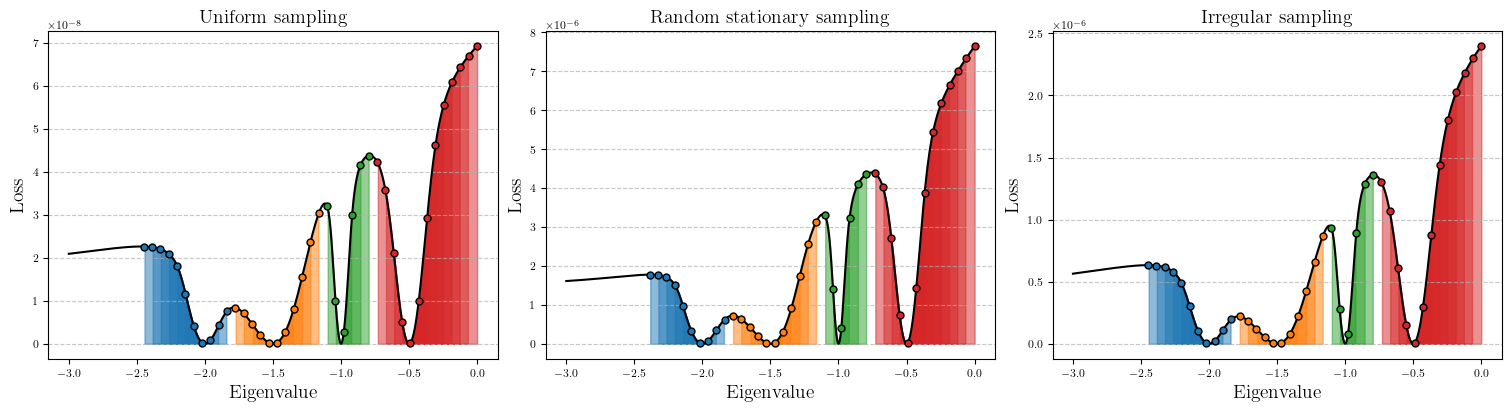

In [4]:
cubic_fig, cubic_axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), constrained_layout=True)
cubic_axes = cubic_axes.reshape(-1)

for dir in sorted_dirs:
    experiment_info = dir.split("_")
    if experiment_info[1] != "12":
        continue

    if experiment_info[-1] == "False":
        fig_label="Uniform sampling"
        subplot_index = 0
    elif experiment_info[-1] == "True":
        fig_label="Random stationary sampling"
        subplot_index = 1
    else:
        fig_label="Irregular sampling"
        subplot_index = 2

    # Colors for different conditions
    colors = {
        -2: 'tab:blue',
        -1.5: 'tab:orange',
        -1: 'tab:green',
        -0.5: 'tab:red',
        0: 'tab:blue'
    }

    # Load the landscape
    landscape_dir = os.path.join(file_dir, dir, "landscape.pickle")
    with open(landscape_dir, 'rb') as handle:
        landscape = pickle.load(handle)
    x = landscape[0]
    Y = landscape[1]

    # Load the analysis
    analysis_dir = os.path.join(file_dir, dir, "analysis.pickle")
    with open(analysis_dir, 'rb') as handle:
        analysis = pickle.load(handle)

    if experiment_info[0] == "Cubic":
        ax = cubic_axes[subplot_index]
        ax.plot(x, Y, c='black')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        for result_name in analysis:
            eigval_history = analysis[result_name][0]
            loss_history = analysis[result_name][1]
            xs = np.array(eigval_history)
            ys = np.array(loss_history)

            # Determine the final converged eigenvalue
            final_eigenvalue = xs[-1]
            for key, color in colors.items():
                gap = final_eigenvalue - key
                if np.abs(final_eigenvalue - key) < 10**-3:
                    # Fill the area under the curve for this segment
                    ax.fill_between(x, 0, Y, where=(x >= xs[0]) & (x <= xs[-1]), color=color, alpha=0.5)
                    ax.fill_between(x, 0, Y, where=(x <= xs[0]) & (x >= xs[-1]), color=color, alpha=0.5)
                    # Mark the initial condition
                    ax.plot(xs[0], ys[0], 'o', c=color, markersize=5, markeredgecolor="black")

        ax.set_title(f"{fig_label}", fontsize=14)
        # Set the title and labels
        #ax.set_title(f"Experiment configuration - dyn: {experiment_info[0]},\nseed: {experiment_info[1]}, time interval: {experiment_info[2]}, Randomness: {experiment_info[-1]}")
        print(f"Experiment configuration - dyn: {experiment_info[0]},\nseed: {experiment_info[1]}, time interval: {experiment_info[2]}, Randomness: {experiment_info[-1]}")
        ax.set_xlabel("Eigenvalue", fontsize=14)
        ax.set_ylabel("Loss", fontsize=14)

plt.savefig(os.path.join(base_dir, "region_cubic_12.png"), dpi=650)
plt.show()

Experiment configuration - dyn: Pendulum,
seed: 12, time interval: 0.01, Randomness: False
Experiment configuration - dyn: Pendulum,
seed: 12, time interval: 0.1, Randomness: Irregular
Experiment configuration - dyn: Pendulum,
seed: 12, time interval: 0.1, Randomness: True


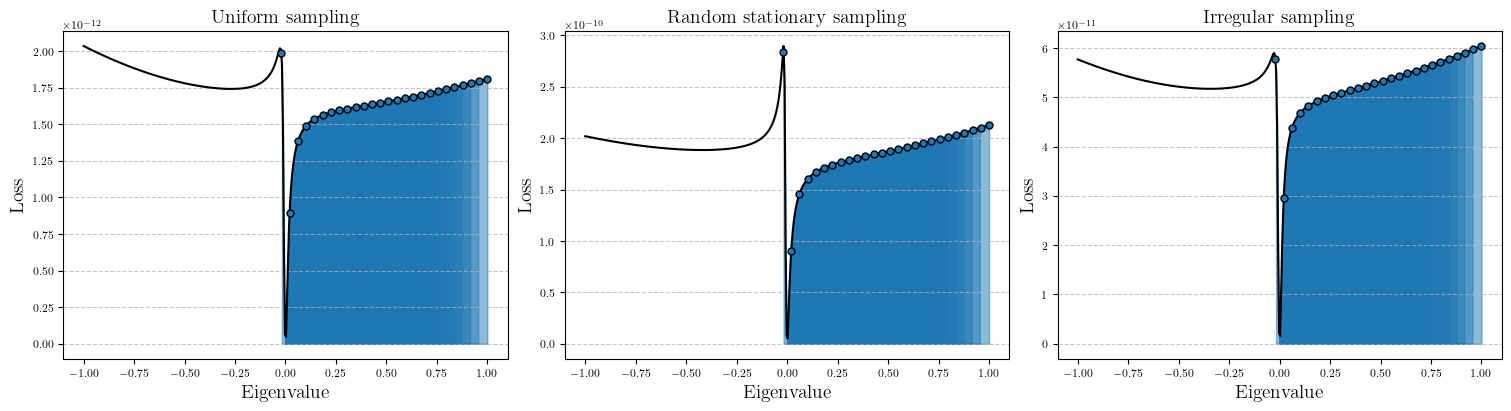

In [5]:
pendulum_fig, pendulum_axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), constrained_layout=True)
pendulum_axes = pendulum_axes.reshape(-1)
for dir in sorted_dirs:
    experiment_info = dir.split("_")
    if experiment_info[1] != "12":
        continue

    if experiment_info[-1] == "False":
        fig_label="Uniform sampling"
        subplot_index = 0
    elif experiment_info[-1] == "True":
        fig_label="Random stationary sampling"
        subplot_index = 1
    else:
        fig_label="Irregular sampling"
        subplot_index = 2

    # Colors for different conditions
    colors = {
        -2: 'tab:blue',
        -1.5: 'tab:orange',
        -1: 'tab:green',
        -0.5: 'tab:red',
        0: 'tab:blue'
    }

    # Load the landscape
    landscape_dir = os.path.join(file_dir, dir, "landscape.pickle")
    with open(landscape_dir, 'rb') as handle:
        landscape = pickle.load(handle)
    x = landscape[0]
    Y = landscape[1]

    # Load the analysis
    analysis_dir = os.path.join(file_dir, dir, "analysis.pickle")
    with open(analysis_dir, 'rb') as handle:
        analysis = pickle.load(handle)

    if experiment_info[0] == "Pendulum":
        ax = pendulum_axes[subplot_index]
        ax.plot(x, Y, c='black')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        for result_name in analysis:
            eigval_history = analysis[result_name][0]
            loss_history = analysis[result_name][1]
            xs = np.array(eigval_history)
            ys = np.array(loss_history)

            # Determine the final converged eigenvalue
            final_eigenvalue = xs[-1]
            for key, color in colors.items():
                gap = final_eigenvalue - key
                if np.abs(final_eigenvalue - key) < 10**-3:
                    # Fill the area under the curve for this segment
                    ax.fill_between(x, 0, Y, where=(x >= xs[0]) & (x <= xs[-1]), color=color, alpha=0.5)
                    ax.fill_between(x, 0, Y, where=(x <= xs[0]) & (x >= xs[-1]), color=color, alpha=0.5)
                    # Mark the initial condition
                    ax.plot(xs[0], ys[0], 'o', c=color, markersize=5, markeredgecolor="black")

        ax.set_title(f"{fig_label}", fontsize=14)
        # Set the title and labels
        #ax.set_title(f"Experiment configuration - dyn: {experiment_info[0]},\nseed: {experiment_info[1]}, time interval: {experiment_info[2]}, Randomness: {experiment_info[-1]}")
        print(f"Experiment configuration - dyn: {experiment_info[0]},\nseed: {experiment_info[1]}, time interval: {experiment_info[2]}, Randomness: {experiment_info[-1]}")
        ax.set_xlabel("Eigenvalue", fontsize=14)
        ax.set_ylabel("Loss", fontsize=14)

plt.savefig(os.path.join(base_dir, "region_pendulum_12.png"), dpi=650)
plt.show()

Experiment configuration - dyn: Duffing,
seed: 12, time interval: 0.01, Randomness: False
Experiment configuration - dyn: Duffing,
seed: 12, time interval: 0.1, Randomness: Irregular
Experiment configuration - dyn: Duffing,
seed: 12, time interval: 0.1, Randomness: True


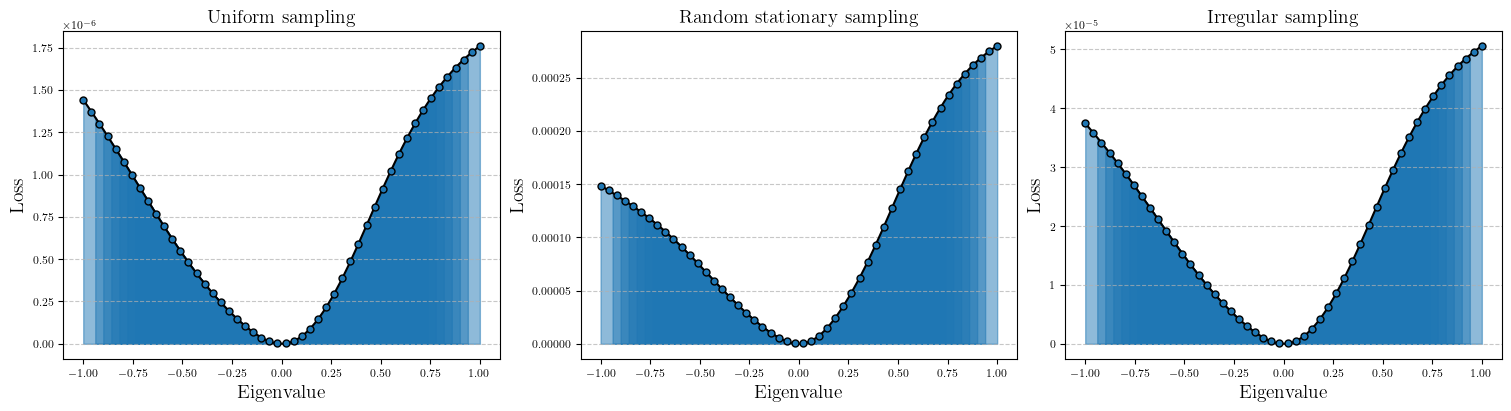

In [6]:
duffing_fig, duffing_axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), constrained_layout=True)
duffing_axes = duffing_axes.reshape(-1)
for dir in sorted_dirs:
    experiment_info = dir.split("_")
    if experiment_info[1] != "12":
        continue

    if experiment_info[-1] == "False":
        fig_label="Uniform sampling"
        subplot_index = 0
    elif experiment_info[-1] == "True":
        fig_label="Random stationary sampling"
        subplot_index = 1
    else:
        fig_label="Irregular sampling"
        subplot_index = 2

    # Colors for different conditions
    colors = {
        -2: 'tab:blue',
        -1.5: 'tab:orange',
        -1: 'tab:green',
        -0.5: 'tab:red',
        0: 'tab:blue'
    }

    # Load the landscape
    landscape_dir = os.path.join(file_dir, dir, "landscape.pickle")
    with open(landscape_dir, 'rb') as handle:
        landscape = pickle.load(handle)
    x = landscape[0]
    Y = landscape[1]

    # Load the analysis
    analysis_dir = os.path.join(file_dir, dir, "analysis.pickle")
    with open(analysis_dir, 'rb') as handle:
        analysis = pickle.load(handle)

    if experiment_info[0] == "Duffing":
        ax = duffing_axes[subplot_index]
        ax.plot(x, Y, c='black')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        for result_name in analysis:
            eigval_history = analysis[result_name][0]
            loss_history = analysis[result_name][1]
            xs = np.array(eigval_history)
            ys = np.array(loss_history)

            # Determine the final converged eigenvalue
            final_eigenvalue = xs[-1]
            for key, color in colors.items():
                gap = final_eigenvalue - key
                if np.abs(final_eigenvalue - key) < 10**-3:
                    # Fill the area under the curve for this segment
                    ax.fill_between(x, 0, Y, where=(x >= xs[0]) & (x <= xs[-1]), color=color, alpha=0.5)
                    ax.fill_between(x, 0, Y, where=(x <= xs[0]) & (x >= xs[-1]), color=color, alpha=0.5)
                    # Mark the initial condition
                    ax.plot(xs[0], ys[0], 'o', c=color, markersize=5, markeredgecolor="black")

        ax.set_title(f"{fig_label}", fontsize=14)
        # Set the title and labels
        #ax.set_title(f"Experiment configuration - dyn: {experiment_info[0]},\nseed: {experiment_info[1]}, time interval: {experiment_info[2]}, Randomness: {experiment_info[-1]}")
        print(f"Experiment configuration - dyn: {experiment_info[0]},\nseed: {experiment_info[1]}, time interval: {experiment_info[2]}, Randomness: {experiment_info[-1]}")
        ax.set_xlabel("Eigenvalue", fontsize=14)
        ax.set_ylabel("Loss", fontsize=14)

plt.savefig(os.path.join(base_dir, "region_Duffing_12.png"), dpi=650)
plt.show()

Optimization Results

In [7]:
file_dir = os.path.join(pardir,'results_robustness/2025-05-11/')
dirs = [f for f in os.listdir(file_dir) if not os.path.isfile(os.path.join(file_dir, f))]
sorted_dirs = sorted(dirs, key=extract_components)

for dir in sorted_dirs:
    experiment_info = dir.split("_")
    if experiment_info[1] != "12":
        continue

    if experiment_info[-1] == "False":
        fig_label="Uniform sampling"
    elif experiment_info[-1] == "True":
        fig_label="Random stationary sampling"
    else:
        fig_label="Irregular sampling"

    colors = {
        -2: ['tab:blue', np.array([0,0.6401844,0,0,0,-0.76822128,0,0,0])], # unit normalized coefficients
        -1.5: ['tab:orange', np.array([0,0,0,0,0,1,0,0,0])],
        -1: ['tab:green', np.array([0,0,1,0,0,0,0,0,0])],
        -0.5: ['tab:red', np.array([1,0,0,0,0,0,0,0,0])],
    }        
    
    if experiment_info[0] == "Cubic":
        result_dir = os.path.join(file_dir, dir+"/test_perf.pickle")
        with open(result_dir, 'rb') as handle:
            result = pickle.load(handle)
        terms = result[-1]
        terms = [f"${term}(t)$"for term in terms]
        print(f"Experiment configuration - dyn: {experiment_info[0]}, seed: {experiment_info[1]}, time interval: {experiment_info[2]}, Randomness: {experiment_info[3]}")

        learned_function_dataframe = pd.DataFrame(index=[-2,-1.5,-1,-0.5], columns=["$\mu^*$"]+terms)
        for key, info in colors.items():
            # eig_val and coef related to a certain eigenvalue are stored.
            pred_eig_val_list = []
            pred_coef_list = []
            for result_instance in result[0]:
                if np.abs(result_instance[0] - key) < 10**-3:
                    pred_eig_val_list.append(result_instance[0])
                    pred_coef_list.append(result_instance[1])

            # Reporting the mean value
            learned_function_dataframe.loc[key,"$\mu^*$"] = np.round(np.mean(np.array(pred_eig_val_list)),3)
            learned_function_dataframe.loc[key,terms] = np.round(np.mean(np.array(pred_coef_list), axis=0),3)

        latex_df = learned_function_dataframe.to_latex(index=False, caption=f"{experiment_info[0]}_{fig_label}_{experiment_info[1]}", escape=False,float_format="%.3f")
        print(latex_df)

Experiment configuration - dyn: Cubic, seed: 12, time interval: 0.01, Randomness: False
\begin{table}
\caption{Cubic_Uniform sampling_12}
\begin{tabular}{llllllllll}
\toprule
$\mu^*$ & $x_1(t)$ & $x_2(t)$ & $x_1^2(t)$ & $x_1 x_2(t)$ & $x_2^2(t)$ & $x_1^3(t)$ & $x_1^2 x_2(t)$ & $x_1 x_2^2(t)$ & $x_2^3(t)$ \\
\midrule
-2.000 & 0.000 & 0.640 & 0.000 & -0.000 & -0.000 & -0.768 & -0.000 & 0.000 & -0.000 \\
-1.500 & 0.000 & 0.000 & -0.000 & -0.000 & -0.000 & -0.273 & 0.000 & -0.000 & -0.000 \\
-1.000 & 0.000 & -0.000 & 1.000 & 0.000 & -0.000 & 0.000 & 0.000 & -0.000 & 0.000 \\
-0.500 & 1.000 & -0.000 & -0.000 & 0.000 & 0.000 & -0.000 & -0.000 & 0.000 & 0.000 \\
\bottomrule
\end{tabular}
\end{table}

Experiment configuration - dyn: Cubic, seed: 12, time interval: 0.1, Randomness: Irregular
\begin{table}
\caption{Cubic_Irregular sampling_12}
\begin{tabular}{llllllllll}
\toprule
$\mu^*$ & $x_1(t)$ & $x_2(t)$ & $x_1^2(t)$ & $x_1 x_2(t)$ & $x_2^2(t)$ & $x_1^3(t)$ & $x_1^2 x_2(t)$ & $x_1 x_2^2(t)$

Identifying high order Koopman eigenfunctions

Experiment configuration - dyn: Cubic,
seed: 12, time interval: 0.01, Randomness: True


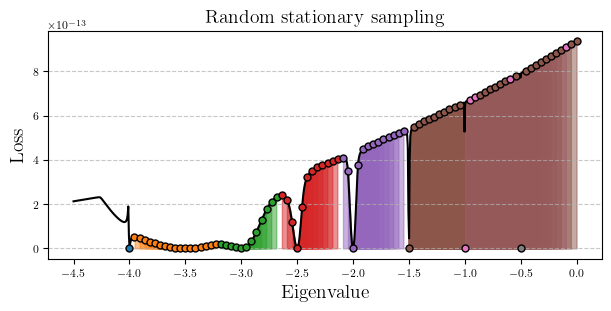

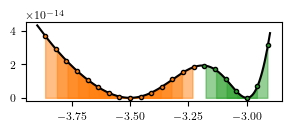

In [9]:
file_dir = os.path.join(pardir,'results_high_order/2025-05-11/')
dirs = [f for f in os.listdir(file_dir) if not os.path.isfile(os.path.join(file_dir, f))]
sorted_dirs = sorted(dirs, key=extract_components)

cubic_fig, cubic_axes = plt.subplots(nrows=1, ncols=1, figsize=(6,3), constrained_layout=True)
cubic_inner_fig, cubic_inner_axes = plt.subplots(nrows=1, ncols=1, figsize=(2.8,1.2), constrained_layout=True)

for dir in sorted_dirs:
    experiment_info = dir.split("_")
    if experiment_info[1] != "12":
        continue

    if experiment_info[-1] == "False":
        fig_label="Uniform sampling"
        subplot_index = 0
    elif experiment_info[-1] == "True":
        fig_label="Random stationary sampling"
        subplot_index = 1
    else:
        fig_label="Irregular sampling"
        subplot_index = 2

    # Colors for different conditions
    colors = {
        -4: 'tab:blue',
        -3.5: 'tab:orange',
        -3: 'tab:green',
        -2.5: 'tab:red',
        -2: 'tab:purple',
        -1.5: 'tab:brown',
        -1: 'tab:pink',
        -0.5: 'tab:gray'
    }

    # Load the landscape
    landscape_dir = os.path.join(file_dir, dir, "landscape.pickle")
    with open(landscape_dir, 'rb') as handle:
        landscape = pickle.load(handle)
    x = landscape[0]
    Y = landscape[1]

    # Load the analysis
    analysis_dir = os.path.join(file_dir, dir, "analysis.pickle")
    with open(analysis_dir, 'rb') as handle:
        analysis = pickle.load(handle)

    if experiment_info[0] == "Cubic":
        ax = cubic_axes
        ax.plot(x, Y, c='black')
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        ax2 = cubic_inner_axes
        indexer  = (x <-2.9) * (x > -3.9)
        ax2.plot(x[indexer], Y[indexer], c='black')
        # ax2.grid(axis='y', linestyle='--', alpha=0.7)

        for result_name in analysis:
            eigval_history = analysis[result_name][0]
            loss_history = analysis[result_name][1]
            xs = np.array(eigval_history)
            ys = np.array(loss_history)

            # Determine the final converged eigenvalue
            final_eigenvalue = xs[-1]
            for key, color in colors.items():
                gap = final_eigenvalue - key
                if np.abs(final_eigenvalue - key) < 10**-3:
                    # Fill the area under the curve for this segment
                    ax.fill_between(x, 0, Y, where=(x >= xs[0]) & (x <= xs[-1]), color=color, alpha=0.5)
                    ax.fill_between(x, 0, Y, where=(x <= xs[0]) & (x >= xs[-1]), color=color, alpha=0.5)
                    # Mark the initial condition
                    ax.plot(xs[0], ys[0], 'o', c=color, markersize=5, markeredgecolor="black")

                    if (xs[0] < -2.9) * (xs[0] > -3.9):
                        # Fill the area under the curve for this segment
                        ax2.fill_between(x, 0, Y, where=(x >= xs[0]) & (x <= xs[-1]), color=color, alpha=0.5)
                        ax2.fill_between(x, 0, Y, where=(x <= xs[0]) & (x >= xs[-1]), color=color, alpha=0.5)
                        # Mark the initial condition
                        ax2.plot(xs[0], ys[0], 'o', c=color, markersize=3, markeredgecolor="black")
                    else:
                        pass

            # if np.isclose(xs[0],-0.5, atol=10**-4):
            #     ax.plot(xs, ys, 'o', c="red", markersize=5, markeredgecolor="black")
        ax.set_title(f"{fig_label}", fontsize=14)
        # Set the title and labels
        #ax.set_title(f"Experiment configuration - dyn: {experiment_info[0]},\nseed: {experiment_info[1]}, time interval: {experiment_info[2]}, Randomness: {experiment_info[-1]}")
        print(f"Experiment configuration - dyn: {experiment_info[0]},\nseed: {experiment_info[1]}, time interval: {experiment_info[2]}, Randomness: {experiment_info[-1]}")
        ax.set_xlabel("Eigenvalue", fontsize=14)
        ax.set_ylabel("Loss", fontsize=14)
        ax.locator_params(axis='x', nbins=10)

        # ax2.set_xlabel("Eigenvalue", fontsize=7)
        # ax2.set_ylabel("Loss", fontsize=7)
        ax2.locator_params(axis='x', nbins=5)



cubic_fig.savefig(os.path.join(pardir,"figure_robustness", "region_cubic_highorder_12.png"), dpi=650)
cubic_inner_fig.savefig(os.path.join(pardir,"figure_robustness", "region_cubic_highorder_inner_12.png"), dpi=650)
plt.show()

In [10]:
for dir in sorted_dirs:
    experiment_info = dir.split("_")
    if experiment_info[1] != "12":
        continue

    if experiment_info[-1] == "False":
        fig_label="Uniform sampling"
    elif experiment_info[-1] == "True":
        fig_label="Random stationary sampling"
    else:
        fig_label="Irregular sampling"

    colors = {
        -4: 'tab:blue',
        -3.5: 'tab:orange',
        -3: 'tab:green',
        -2.5: 'tab:red',
        -2: 'tab:purple',
        -1.5: 'tab:brown',
        -1: 'tab:pink',
        -0.5: 'tab:gray'
    }       
    
    if experiment_info[0] == "Cubic":
        result_dir = os.path.join(file_dir, dir+"/test_perf.pickle")
        with open(result_dir, 'rb') as handle:
            result = pickle.load(handle)
        terms = result[-1]
        terms = [f"${term}(t)$"for term in terms]
        print(f"Experiment configuration - dyn: {experiment_info[0]}, seed: {experiment_info[1]}, time interval: {experiment_info[2]}, Randomness: {experiment_info[3]}")

        learned_function_dataframe = pd.DataFrame(index=[-4,-3.5,-3,-2.5, -2, -1.5, -1,-0.5], columns=["$\mu^*$"]+terms,dtype=float)
        for key, info in colors.items():
            # eig_val and coef related to a certain eigenvalue are stored.
            pred_eig_val_list = []
            pred_coef_list = []
            for result_instance in result[0]:
                if np.abs(result_instance[0] - key) < 10**-3:
                    pred_eig_val_list.append(result_instance[0])
                    pred_coef_list.append(result_instance[1])

            # Reporting the mean value
            learned_function_dataframe.loc[key,"$\mu^*$"] = np.round(np.mean(np.array(pred_eig_val_list)),3)
            learned_function_dataframe.loc[key,terms] = np.round(np.mean(np.array(pred_coef_list), axis=0),3)
        # Identify columns where all values are close to zero
        cols_to_drop = [col for col in learned_function_dataframe.columns if np.all(np.isclose(learned_function_dataframe[col], 0, atol=10**-8))]

        # Drop those columns
        learned_function_dataframe = learned_function_dataframe.drop(columns=cols_to_drop)
        latex_df = learned_function_dataframe.to_latex(index=False, caption=f"{experiment_info[0]}_{fig_label}_{experiment_info[1]}", escape=False, float_format="%.3f")
        print(latex_df)

Experiment configuration - dyn: Cubic, seed: 12, time interval: 0.01, Randomness: True
\begin{table}
\caption{Cubic_Random stationary sampling_12}
\begin{tabular}{rrrrrrrrrrrr}
\toprule
$\mu^*$ & $x_1(t)$ & $x_2(t)$ & $x_1^2(t)$ & $x_1 x_2(t)$ & $x_2^2(t)$ & $x_1^3(t)$ & $x_1^2 x_2(t)$ & $x_1^4(t)$ & $x_1^3 x_2(t)$ & $x_1^5(t)$ & $x_1^6(t)$ \\
\midrule
-4.000 & 0.000 & -0.000 & 0.000 & -0.000 & 0.336 & 0.000 & -0.000 & -0.000 & -0.807 & 0.000 & 0.484 \\
-3.500 & -0.000 & -0.000 & 0.000 & -0.000 & -0.000 & 0.000 & -0.000 & -0.000 & -0.640 & 0.000 & 0.768 \\
-3.000 & 0.000 & -0.000 & 0.000 & -0.000 & 0.000 & -0.000 & -0.533 & 0.000 & -0.000 & 0.640 & -0.280 \\
-2.500 & 0.000 & -0.000 & 0.000 & -0.469 & -0.000 & -0.000 & 0.000 & 0.563 & -0.000 & 0.178 & -0.000 \\
-2.000 & 0.000 & -0.001 & 0.000 & 0.000 & -0.000 & 0.001 & 0.000 & -0.077 & -0.000 & 0.000 & -0.000 \\
-1.500 & -0.000 & -0.000 & 0.000 & -0.000 & -0.000 & 0.429 & 0.000 & 0.000 & -0.000 & 0.000 & -0.000 \\
-1.000 & -0.000 & 0.00

In [11]:
file_dir = os.path.join(pardir,'results_robustness/2025-05-11/')
dirs = [f for f in os.listdir(file_dir) if not os.path.isfile(os.path.join(file_dir, f))]
sorted_dirs = sorted(dirs, key=extract_components)

learned_function_list = []
index_label_list = []
colors = {
        0:[ 0.4472136 , -0.89442719]
    }        
for dir in sorted_dirs:
    experiment_info = dir.split("_")
    if experiment_info[1] != "12": # Pick a certain 12.
        continue
    if experiment_info[0] == "Pendulum": # Pick only a pendulum experiment
        result_dir = os.path.join(file_dir, dir+"/test_perf.pickle")
        with open(result_dir, 'rb') as handle:
            result = pickle.load(handle)
        terms = result[1]
        terms = [f"${term}(t)$"for term in terms]

        print(f"Experiment configuration - dyn: {experiment_info[0]}, seed: {experiment_info[1]}, time interval: {experiment_info[2]}, Randomness: {experiment_info[3]}")

        if experiment_info[-1] == "False":
            fig_label="Uniform sampling"

        elif experiment_info[-1] == "True":
            fig_label="Random stationary sampling"

        else:
            fig_label="Irregular sampling"

        for key, _ in colors.items():
            # eig_val and coef related to a certain eigenvalue are stored.
            pred_eig_val_list = []
            pred_coef_list = []
            for result_instance in result[0]: # Iterate over the experiment result. result[1] is the name of the observables.
                # print(result_instance[0])
                if np.abs(result_instance[0] - key) < 10**-1:
                    pred_eig_val_list.append(result_instance[0])
                    pred_coef_list.append(result_instance[1])

            # Reporting the mean value
            learned_function_list.append(np.concatenate([np.array([np.round(np.mean(np.array(pred_eig_val_list)),3)]), np.round(np.mean(np.array(pred_coef_list), axis=0),3)]))
            caption=f"{experiment_info[0]}_{fig_label}_{experiment_info[1]}"
            index_label_list.append(fig_label)
    else:
        continue 

learned_function_dataframe =pd.DataFrame(np.stack(learned_function_list, axis=0), index=index_label_list, columns=["$\mu^*$"]+terms,dtype=float)
# Identify columns where all values are close to zero
cols_to_drop = [col for col in learned_function_dataframe.columns[1:] if np.all(np.isclose(learned_function_dataframe[col], 0, atol=10**-8))]

# Drop those columns
learned_function_dataframe = learned_function_dataframe.drop(columns=cols_to_drop)
second_row, third_row = learned_function_dataframe.iloc[1].copy(), learned_function_dataframe.iloc[2].copy()
learned_function_dataframe.iloc[1], learned_function_dataframe.iloc[2] = third_row, second_row
learned_function_dataframe.index = [index_label_list[0],index_label_list[2],index_label_list[1]]
latex_df = learned_function_dataframe.to_latex(index=True, caption=caption, escape=False, float_format="%.3f")
print(latex_df)

Experiment configuration - dyn: Pendulum, seed: 12, time interval: 0.01, Randomness: False
Experiment configuration - dyn: Pendulum, seed: 12, time interval: 0.1, Randomness: Irregular
Experiment configuration - dyn: Pendulum, seed: 12, time interval: 0.1, Randomness: True
\begin{table}
\caption{Pendulum_Random stationary sampling_12}
\begin{tabular}{lrrrrrrrr}
\toprule
 & $\mu^*$ & $x_1^2(t)$ & $x_2^2(t)$ & $x_1^4(t)$ & $x_1^2 x_2^2(t)$ & $x_2^4(t)$ & $cos(1 x_1)(t)$ & $cos(1 x_2)(t)$ \\
\midrule
Uniform sampling & 0.000 & 0.002 & 0.452 & -0.000 & 0.000 & -0.000 & -0.892 & 0.008 \\
Random stationary sampling & 0.000 & 0.096 & 0.605 & -0.003 & 0.012 & -0.005 & -0.738 & 0.282 \\
Irregular sampling & 0.000 & 0.006 & 0.460 & -0.000 & 0.001 & -0.000 & -0.888 & 0.020 \\
\bottomrule
\end{tabular}
\end{table}



In [12]:
file_dir = os.path.join(pardir,'results_robustness/2025-05-11/')
dirs = [f for f in os.listdir(file_dir) if not os.path.isfile(os.path.join(file_dir, f))]
sorted_dirs = sorted(dirs, key=extract_components)


learned_function_list = []
index_label_list = []
colors = {
        0:[ 0.4472136 , -0.89442719]
    }        
for dir in sorted_dirs:
    experiment_info = dir.split("_")
    if experiment_info[1] != "12":
        continue
    if experiment_info[0] == "Duffing":
        result_dir = os.path.join(file_dir, dir+"/test_perf.pickle")
        with open(result_dir, 'rb') as handle:
            result = pickle.load(handle)
        terms = result[-1]
        terms = [f"${term}(t)$"for term in terms]

        print(f"Experiment configuration - dyn: {experiment_info[0]}, seed: {experiment_info[1]}, time interval: {experiment_info[2]}, Randomness: {experiment_info[3]}")

        if experiment_info[-1] == "False":
            fig_label="Uniform sampling"
        elif experiment_info[-1] == "True":
            fig_label="Random stationary sampling"
        else:
            fig_label="Irregular sampling"

        for key, info in colors.items():
            # eig_val and coef related to a certain eigenvalue are stored.
            pred_eig_val_list = []
            pred_coef_list = []
            for result_instance in result[0]:
                if np.abs(result_instance[0] - key) < 10**-3:
                    pred_eig_val_list.append(result_instance[0])
                    pred_coef_list.append(result_instance[1])

            # Reporting the mean value
            learned_function_list.append(np.concatenate([np.array([np.round(np.mean(np.array(pred_eig_val_list)),4)]),np.round(np.mean(np.array(pred_coef_list), axis=0),3)]))
            caption=f"{experiment_info[0]}_{fig_label}_{experiment_info[1]}"
            index_label_list.append(fig_label)
    else:
        continue 

learned_function_dataframe =pd.DataFrame(np.stack(learned_function_list, axis=0), index=index_label_list, columns=["$\mu^*$"]+terms,dtype=float)
# Identify columns where all values are close to zero
cols_to_drop = [col for col in learned_function_dataframe.columns[1:] if np.all(np.isclose(learned_function_dataframe[col], 0, atol=10**-8))]

# Drop those columns
learned_function_dataframe = learned_function_dataframe.drop(columns=cols_to_drop)
second_row, third_row = learned_function_dataframe.iloc[1].copy(), learned_function_dataframe.iloc[2].copy()
learned_function_dataframe.iloc[1], learned_function_dataframe.iloc[2] = third_row, second_row
learned_function_dataframe.index = [index_label_list[0],index_label_list[2],index_label_list[1]]
latex_df = learned_function_dataframe.to_latex(index=True, caption=caption, escape=False, float_format="%.3f")
print(latex_df)

Experiment configuration - dyn: Duffing, seed: 12, time interval: 0.01, Randomness: False
Experiment configuration - dyn: Duffing, seed: 12, time interval: 0.1, Randomness: Irregular
Experiment configuration - dyn: Duffing, seed: 12, time interval: 0.1, Randomness: True
\begin{table}
\caption{Duffing_Random stationary sampling_12}
\begin{tabular}{lrrrr}
\toprule
 & $\mu^*$ & $x_1^2(t)$ & $x_2^2(t)$ & $x_1^4(t)$ \\
\midrule
Uniform sampling & 0.000 & 0.667 & -0.667 & -0.333 \\
Random stationary sampling & -0.000 & 0.667 & -0.667 & -0.333 \\
Irregular sampling & 0.000 & 0.667 & -0.667 & -0.333 \\
\bottomrule
\end{tabular}
\end{table}

